In [1]:
!pip install torchsummary 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset, DataLoader, Dataset, random_split
from torchsummary import summary

In [2]:
splits = ['letters', 'byclass', 'bymerge', 'balanced', 'digits', 'mnist']

In [6]:
train_datasets = [
    EMNIST(root='data/', split='letters', train=True, download=False),
    EMNIST(root='data/', split='byclass', train=True, download=False),
    EMNIST(root='data/', split='bymerge', train=True, download=False),
    EMNIST(root='data/', split='balanced', train=True, download=False),
    EMNIST(root='data/', split='digits', train=True, download=False),
    EMNIST(root='data/', split='mnist', train=True, download=False),
]

test_datasets = [
    EMNIST(root='data/', split='letters', train=False, download=False),
    EMNIST(root='data/', split='byclass', train=False, download=False),
    EMNIST(root='data/', split='bymerge', train=False, download=False),
    EMNIST(root='data/', split='balanced', train=False, download=False),
    EMNIST(root='data/', split='digits', train=False, download=False),
    EMNIST(root='data/', split='mnist', train=False, download=False),
]

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_datasets_tensors = [
    EMNIST(root='data/', split='letters', train=True, download=False, transform=transform),
    EMNIST(root='data/', split='byclass', train=True, download=False, transform=transform),
    EMNIST(root='data/', split='bymerge', train=True, download=False, transform=transform),
    EMNIST(root='data/', split='balanced', train=True, download=False, transform=transform),
    EMNIST(root='data/', split='digits', train=True, download=False, transform=transform),
    EMNIST(root='data/', split='mnist', train=True, download=False, transform=transform),
]

test_datasets_tensors = [
    EMNIST(root='data/', split='letters', train=False, download=False, transform=transform),
    EMNIST(root='data/', split='byclass', train=False, download=False, transform=transform),
    EMNIST(root='data/', split='bymerge', train=False, download=False, transform=transform),
    EMNIST(root='data/', split='balanced', train=False, download=False, transform=transform),
    EMNIST(root='data/', split='digits', train=False, download=False, transform=transform),
    EMNIST(root='data/', split='mnist', train=False, download=False, transform=transform),
]



In [7]:
letters = train_datasets[0]
byclass = train_datasets[1]
bymerge = train_datasets[2]
balanced = train_datasets[3]
digits = train_datasets[4]
mnist = train_datasets[5]

In [8]:
for item in train_datasets:
    print(f"Training {splits[train_datasets.index(item)].capitalize()}: {len(item)}", )
for item in test_datasets:
    print(f"Testing {splits[test_datasets.index(item)].capitalize()}: {len(item)}")

Training Letters: 124800
Training Byclass: 697932
Training Bymerge: 697932
Training Balanced: 112800
Training Digits: 240000
Training Mnist: 60000
Testing Letters: 20800
Testing Byclass: 116323
Testing Bymerge: 116323
Testing Balanced: 18800
Testing Digits: 40000
Testing Mnist: 10000


In [9]:
for item in train_datasets:
    print(f"{splits[train_datasets.index(item)].capitalize()} Classes:")
    print(item.classes)
    print("\n")

Letters Classes:
['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Byclass Classes:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Bymerge Classes:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']


Balanced Classes:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']


Di

In [7]:
digits[0], mnist[0]

((<PIL.Image.Image image mode=L size=28x28>, 8),
 (<PIL.Image.Image image mode=L size=28x28>, 4))

<PIL.Image.Image image mode=L size=28x28 at 0x7F79EEB9F410>
8


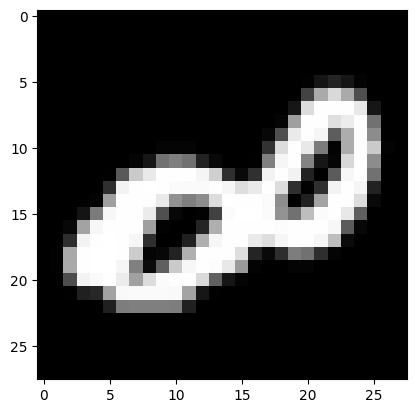

In [8]:
%matplotlib inline

image, label = digits[0]
print(image)
print((digits.classes)[label])
plt.imshow(image, cmap='gray')

<PIL.Image.Image image mode=L size=28x28 at 0x7F79EB74B450>
4


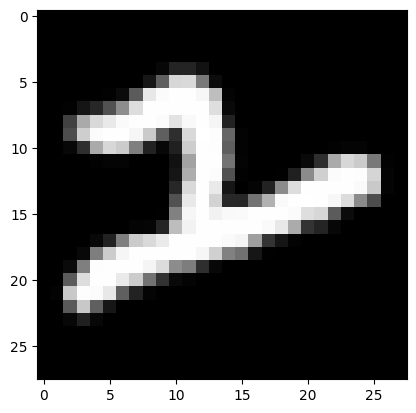

In [9]:
image, label = mnist[0]
print(image)
print((mnist.classes)[label])
plt.imshow(image, cmap='gray')

In [10]:
combined_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
                    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
                   'N/A']
print(len(combined_classes))


63


In [11]:
train_datasets_tensors[1][1][1], train_datasets_tensors[1].classes[train_datasets_tensors[1][1][1]], train_datasets_tensors[2][1][1], train_datasets_tensors[2].classes[train_datasets_tensors[2][1][1]], train_datasets_tensors[3][1][1], train_datasets_tensors[3].classes[train_datasets_tensors[3][1][1]], combined_classes[36]

(36, 'a', 36, 'a', 36, 'a', 'a')

Dataset ByClass
Label:  36 , Letter:  a


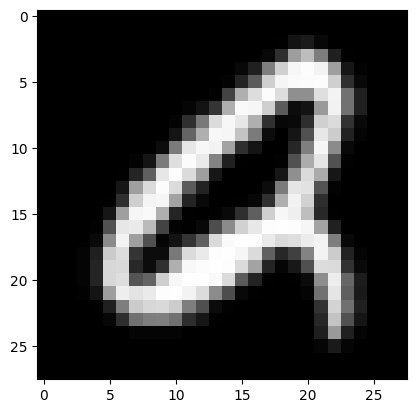

In [12]:
print("Dataset ByClass")
print("Label: ", byclass[1][1], ", Letter: ", byclass.classes[byclass[1][1]])
image, label = byclass[1]
plt.imshow(image, cmap='gray')

Dataset Letters
Label:  1 , Letter:  a


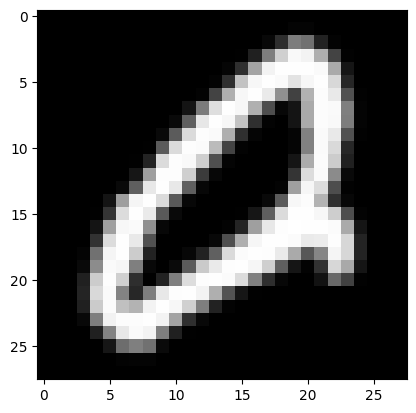

In [57]:
print("Dataset Letters")
print("Label: ", letters[29][1], ", Letter: ", letters.classes[letters[29][1]])
image, label = letters[29]
plt.imshow(image, cmap='gray')

Dataset 3
Label:  36 , Letter:  a


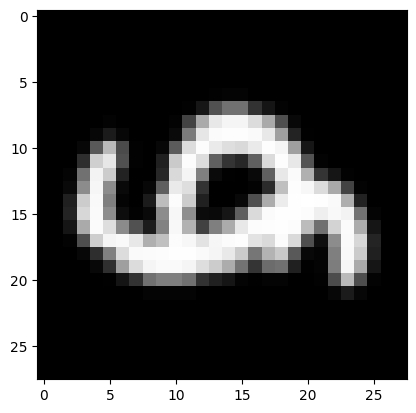

In [22]:
print("Dataset 3")
print("Label: ", train_datasets_tensors[3][1][1], ", Letter: ", train_datasets_tensors[3].classes[train_datasets_tensors[3][1][1]])
image, label = train_datasets_tensors[3][1]
plt.imshow(image.squeeze().numpy(), cmap='gray')

In [59]:
letters.targets, letters.classes

(tensor([23,  7, 16,  ..., 13, 15, 19]),
 ['N/A',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'])

In [13]:
# Create a mapping from original class indices to new class indices
def create_label_mapping(original_classes, combined_classes):
    return {original_class: combined_classes.index(original_class) for original_class in original_classes}

# Function to remap labels
def remap_labels(dataset, label_mapping):
    new_targets = [label_mapping[dataset.classes[label]] for label in dataset.targets]
    dataset.targets = torch.tensor(new_targets)

In [14]:
for dataset in train_datasets_tensors:
    label_mapping = create_label_mapping(dataset.classes, combined_classes)
    remap_labels(dataset, label_mapping)
for dataset in test_datasets_tensors:
    label_mapping = create_label_mapping(dataset.classes, combined_classes)
    remap_labels(dataset, label_mapping)
for dataset in train_datasets:
    label_mapping = create_label_mapping(dataset.classes, combined_classes)
    remap_labels(dataset, label_mapping)
for dataset in test_datasets:
    label_mapping = create_label_mapping(dataset.classes, combined_classes)
    remap_labels(dataset, label_mapping)



Dataset ByClass
Label:  36 , Letter:  a


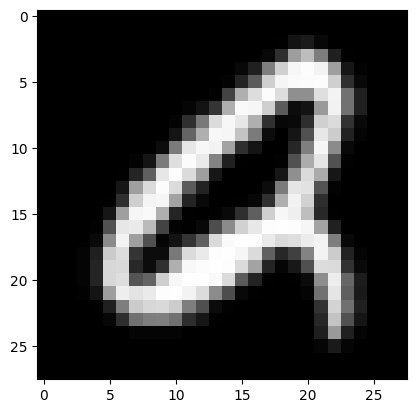

In [66]:
print("Dataset ByClass")
print("Label: ", byclass[1][1], ", Letter: ", byclass.classes[byclass[1][1]])
image, label = byclass[1]
plt.imshow(image, cmap='gray')


Dataset Letters
Label:  36 , Letter:  a


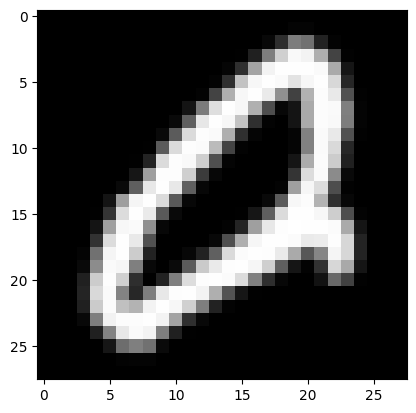

In [71]:
print("Dataset Letters")
print("Label: ", letters[29][1], ", Letter: ", combined_classes[letters[29][1]])
image, label = letters[29]
plt.imshow(image, cmap='gray')

In [62]:
for dataset in train_datasets_tensors:
    print(dataset.targets, dataset.classes)

tensor([58, 42, 51,  ..., 48, 50, 54]) ['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
tensor([35, 36,  6,  ...,  5, 11, 22]) ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
tensor([24, 36,  5,  ...,  9, 36,  1]) ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']
tensor([53, 36, 49,  ..., 23, 31,  8]) ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V'

In [16]:
train_datasets_tensors[1][1][1], train_datasets_tensors[2][1][1], train_datasets_tensors[3][1][1], combined_classes[36]

(36, 36, 36, 'a')

<PIL.Image.Image image mode=L size=28x28 at 0x7F79C5397C90>
a


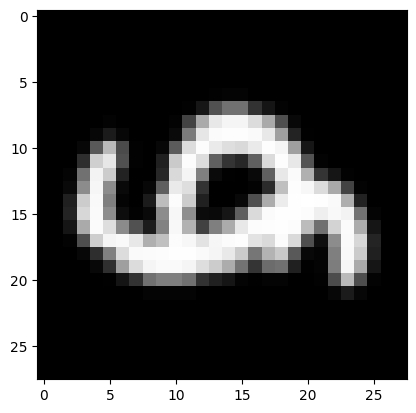

In [72]:
image, label = train_datasets[3][1]
print(image)
print((train_datasets[3].classes)[label])
plt.imshow(image, cmap='gray')

In [15]:
combined_train_dataset = ConcatDataset([dataset for dataset in train_datasets_tensors])
combined_test_dataset = ConcatDataset([dataset for dataset in test_datasets_tensors])

In [17]:
len(combined_train_dataset), len(combined_test_dataset)

(1933464, 322246)

In [16]:
length = 0
for item in train_datasets_tensors:
    length+= len(item)
print(len(combined_train_dataset) == length)

True


In [18]:
# Define the sizes of the splits
total_size = len(combined_train_dataset)
split_ratios = [0.9, 0.1]  # Example: 60%, 20%, 20%
split_sizes = [int(total_size * ratio) for ratio in split_ratios]

# Adjust the last split size to match the total size exactly
split_sizes[-1] = total_size - sum(split_sizes[:-1])

# Split the dataset
train_dataset, val_dataset = random_split(combined_train_dataset, split_sizes)
test_dataset = combined_test_dataset

In [19]:
# Create DataLoaders for each subset
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Verify the sizes of the datasets
print(f'Train dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 1740117
Validation dataset size: 193347
Test dataset size: 322246


In [20]:
data = {
    'image': [transforms.ToPILImage()(img) for img, lbl in test_dataset],
    'label': [combined_classes[lbl] for img, lbl in test_dataset]
}
df = pd.DataFrame(data)

In [23]:
df.dtypes

image    object
label    object
dtype: object

In [22]:
df.to_csv('./data/processed/test_dataset_df.csv', index=False)

In [24]:
def save_indices_and_labels_to_csv(test_dataset, csv_path):
    indices = []
    labels = []
    
    # Iterate through the test dataset and collect indices and labels
    for index, (img, label) in enumerate(test_dataset):
        indices.append(index)
        labels.append(combined_classes[label])
    
    # Create a DataFrame and save to CSV
    df = pd.DataFrame({'index': indices, 'label': labels})
    df.to_csv(csv_path, index=False)

# Example usage
csv_path = './data/EMNIST/test_dataset_index_df.csv'
save_indices_and_labels_to_csv(test_dataset, csv_path)

In [15]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [16]:
class CustomCNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(2)
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True)
        )
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(2)
        )
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace=True)
        )
        self.layer5 = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(256 * 7 * 7, 1024),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(1024, 512),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(32, 62)  
        )
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x


In [17]:
model = CustomCNN()

In [19]:
device

'cuda:0'

In [20]:
from torchsummary import summary

summary(model.to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 64, 14, 14]          18,496
       BatchNorm2d-6           [-1, 64, 14, 14]             128
              ReLU-7           [-1, 64, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]          73,856
       BatchNorm2d-9          [-1, 128, 14, 14]             256
             ReLU-10          [-1, 128, 14, 14]               0
        MaxPool2d-11            [-1, 128, 7, 7]               0
           Conv2d-12            [-1, 256, 7, 7]         295,168
      BatchNorm2d-13            [-1, 256, 7, 7]             512
             ReLU-14            [-1, 25

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)

In [30]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 30
# Create empty loss lists to track values
y_loss = {}
y_loss["train"] = []
y_loss["val"] = []
x_epoch = []
accuracy_vals = []

def training_loop():
    model.to(device)
    model.train()
    print(f'Epoch: {epoch + 1}')
    x_epoch.append(epoch)
    running_loss = 0.0
    epoch_loss = 0.0
    
    for (batch_idx, batch) in enumerate(train_loader):
        train_data, train_labels = batch
        train_data = train_data.to(device)
        train_labels = train_labels.to(device)
        predictions = model(train_data)
        loss = loss_fn(predictions, train_labels)
        running_loss += loss.item()
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_idx % 500 == 499:  # print every 5 batches
            avg_loss_across_batches = running_loss / 500
            print('Batch {0}, Loss: {1:.3f}'.format(batch_idx+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
        
    y_loss["train"].append(epoch_loss / len(train_loader))
    print()
    
def evaluation_loop():
    model.eval()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0
    for (batch_idx, batch) in enumerate(val_loader):
        test_data, test_labels = batch[0].to(device), batch[1].to(device)
        
        with torch.inference_mode():
            test_predictions = model(test_data)
            test_loss = loss_fn(test_predictions, test_labels)
            running_loss += test_loss.item()
            
            # Use torch.argmax to get the class with the highest score
            _, predicted = torch.max(test_predictions, 1)
            total_correct += (predicted == test_labels).sum().item()  # Compare predicted and actual labels
            total_samples += test_labels.size(0)

                
    accuracy = total_correct / total_samples
    avg_loss_across_batches = running_loss / len(val_loader)
    y_loss["val"].append(avg_loss_across_batches)
    accuracy_vals.append(accuracy)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print(f'Total Correct: {total_correct}')
    print(f'Total Samples: {total_samples}')
    print('Accuracy: {0:.3f}'.format(accuracy))
    print('***************************************************')
    print()

for epoch in range(epochs):
    training_loop()
    evaluation_loop()
    scheduler.step()


Epoch: 1
Batch 500, Loss: 1.296
Batch 1000, Loss: 0.611
Batch 1500, Loss: 0.556
Batch 2000, Loss: 0.517
Batch 2500, Loss: 0.504
Batch 3000, Loss: 0.487
Batch 3500, Loss: 0.482
Batch 4000, Loss: 0.461
Batch 4500, Loss: 0.467
Batch 5000, Loss: 0.459
Batch 5500, Loss: 0.452
Batch 6000, Loss: 0.456
Batch 6500, Loss: 0.446
Batch 7000, Loss: 0.439
Batch 7500, Loss: 0.431
Batch 8000, Loss: 0.434
Batch 8500, Loss: 0.424
Batch 9000, Loss: 0.431
Batch 9500, Loss: 0.425
Batch 10000, Loss: 0.419
Batch 10500, Loss: 0.422
Batch 11000, Loss: 0.421
Batch 11500, Loss: 0.422
Batch 12000, Loss: 0.416
Batch 12500, Loss: 0.421
Batch 13000, Loss: 0.412
Batch 13500, Loss: 0.413

Val Loss: 0.416
Total Correct: 163027
Total Samples: 193347
Accuracy: 0.843
***************************************************

Epoch: 2
Batch 500, Loss: 0.402
Batch 1000, Loss: 0.396
Batch 1500, Loss: 0.399
Batch 2000, Loss: 0.399
Batch 2500, Loss: 0.401
Batch 3000, Loss: 0.395
Batch 3500, Loss: 0.393
Batch 4000, Loss: 0.398
Batch 

KeyboardInterrupt: 

In [31]:
model.to('cpu')
torch.save(model.state_dict(), "./models/july31instance.pt")

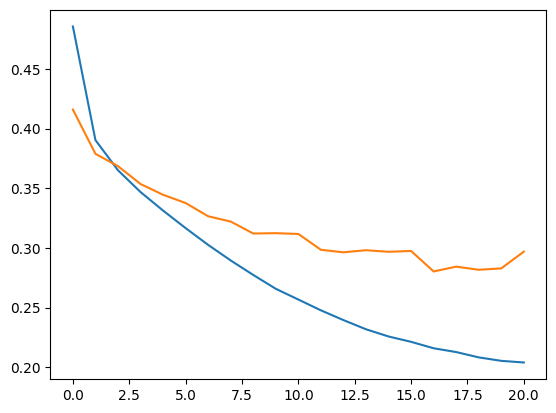

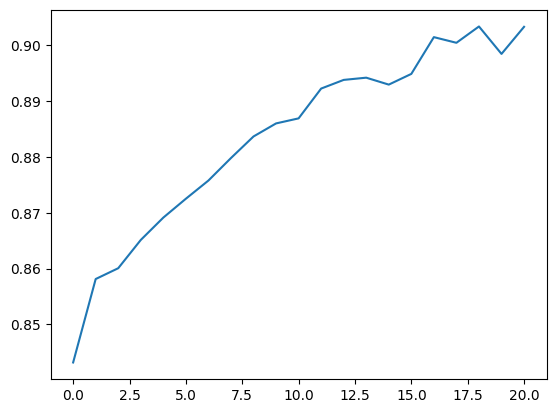

In [32]:
#dt = datetime.now()
#torch.save(ecnnmodel.state_dict(), "./models/eight_1cnn_architecture_model_" + dt.strftime("%m%d%Y_%H_%M_%S") + "0.000001lr_adam_bcewithlogits_32batchsize_balanced" + ".pt")
plt.plot(x_epoch[0:-1], y_loss["train"], label="train")
plt.plot(x_epoch[0:-1], y_loss["val"], label="val")
plt.show()
#plt.savefig("./visualizations/smallerEightCNNArchitectureLoss" + dt.strftime("%m%d%Y_%H_%M_%S") + "0.000001lr_adam_bcewithlogits_32batchsize_balanced" + ".png", bbox_inches="tight", pad_inches=0.3)
plt.plot(x_epoch[0:-1], accuracy_vals, label="val")
plt.show()
#plt.savefig("./visualizations/smallerEightCNNArchitectureAcc" + dt.strftime("%m%d%Y_%H_%M_%S") + "0.000001lr_adam_bcewithlogits_32batchsize_balanced" + ".png", bbox_inches="tight", pad_inches=0.3)
#torch.save(ecnnmodel.state_dict(), "./models/eight_cnn_architecture_model_" + dt.strftime("%m%d%Y_%H_%M_%S_") + str(scheduler.get_last_lr()[0]) + "lr_adam_bcewithlogits_32batchsize_balanced" + ".pt")
#plt.savefig("./visualizations/smallerEightCNNArchitectureAcc" + dt.strftime("%m%d%Y_%H_%M_%S_") + str(scheduler.get_last_lr()[0]) + "lr_adam_bcewithlogits_32batchsize_balanced" + ".png", bbox_inches="tight", pad_inches=0.3)

In [21]:
model.load_state_dict(torch.load('./models/july31instance.pt', map_location=device))

<All keys matched successfully>

In [22]:
model.state_dict()

OrderedDict([('layer1.0.weight',
              tensor([[[[ 0.4402,  0.5975, -0.2209],
                        [-0.2592, -1.0002, -0.3673],
                        [ 0.1159, -0.1094,  0.8134]]],
              
              
                      [[[ 0.2676,  0.5818,  0.4790],
                        [ 0.6583,  0.1719,  0.5965],
                        [ 0.4300,  0.5125,  0.7142]]],
              
              
                      [[[ 0.4340, -0.2686, -0.0385],
                        [ 0.5174, -0.9766,  0.2345],
                        [ 0.3625, -0.8518,  0.4628]]],
              
              
                      [[[ 0.3459, -0.3406, -0.9498],
                        [-0.0883,  1.1426,  0.2420],
                        [-0.3622, -0.0941,  0.1644]]],
              
              
                      [[[ 0.1433,  0.1971,  0.0615],
                        [-0.8795, -0.8683, -0.5330],
                        [ 0.1014,  0.8549,  0.1714]]],
              
              
            

In [32]:
import torch.nn.functional as F
def validation_step(batch):
    images, labels = batch
    model.to(device)
    images = images.to(device)
    labels = labels.to(device)
    out = model(images)                   # Generate predictions
    loss = F.cross_entropy(out, labels)   # Calculate loss
    _, preds = torch.max(out, dim=1)
    acc =  torch.tensor(torch.sum(preds == labels).item() / len(preds))
    return {'val_loss': loss, 'val_acc': acc}

def validation_epoch_end(outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [validation_step(batch) for batch in val_loader]
    return validation_epoch_end(outputs)

print(evaluate(model, test_loader))
    

{'val_loss': 0.2957491874694824, 'val_acc': 0.9004610180854797}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


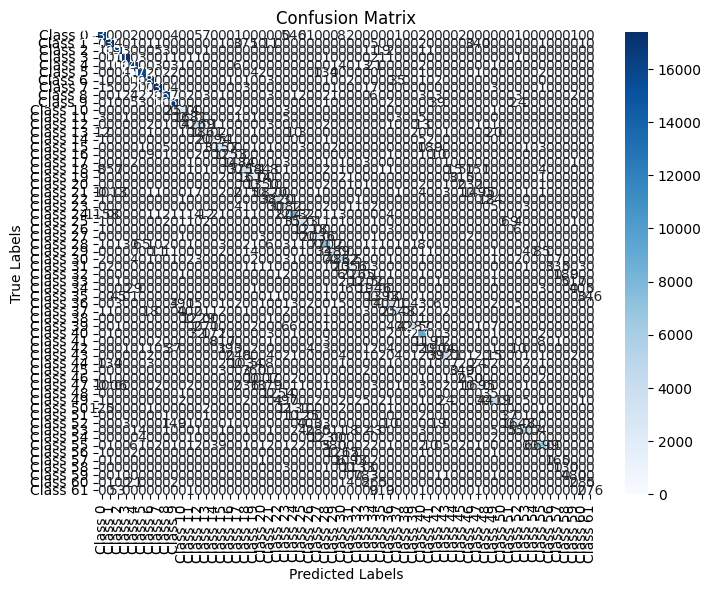

{'val_loss': 0.2957491874694824, 'val_acc': 0.9004456222885622, 'val_precision': 0.8815574349987284, 'val_recall': 0.9004456222885622, 'val_f1': 0.8849774454015092}


In [34]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def validation_step(batch):
    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)
    out = model(images)  # Generate predictions
    loss = F.cross_entropy(out, labels)  # Calculate loss
    _, preds = torch.max(out, dim=1)
    return {'val_loss': loss, 'preds': preds, 'labels': labels}

def validation_epoch_end(outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()  # Combine losses

    all_preds = torch.cat([x['preds'] for x in outputs])
    all_labels = torch.cat([x['labels'] for x in outputs])
    
    # Calculate accuracy
    correct = torch.sum(all_preds == all_labels).item()
    total_samples = len(all_labels)
    epoch_acc = correct / total_samples
    
    # Calculate precision, recall, and f1-score
    precision = precision_score(all_labels.cpu(), all_preds.cpu(), average='weighted')
    recall = recall_score(all_labels.cpu(), all_preds.cpu(), average='weighted')
    f1 = f1_score(all_labels.cpu(), all_preds.cpu(), average='weighted')
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(all_labels.cpu(), all_preds.cpu())
    
    # Plot confusion matrix
    plt.figure(figsize=(20, 20))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[f'Class {i}' for i in range(conf_matrix.shape[1])], 
                yticklabels=[f'Class {i}' for i in range(conf_matrix.shape[0])])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return {
        'val_loss': epoch_loss.item(),
        'val_acc': epoch_acc,
        'val_precision': precision,
        'val_recall': recall,
        'val_f1': f1
    }

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [validation_step(batch) for batch in val_loader]
    return validation_epoch_end(outputs)

# Assuming `device` is already defined and `test_loader` is your DataLoader for the validation set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
metrics = evaluate(model, test_loader)
print(metrics)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


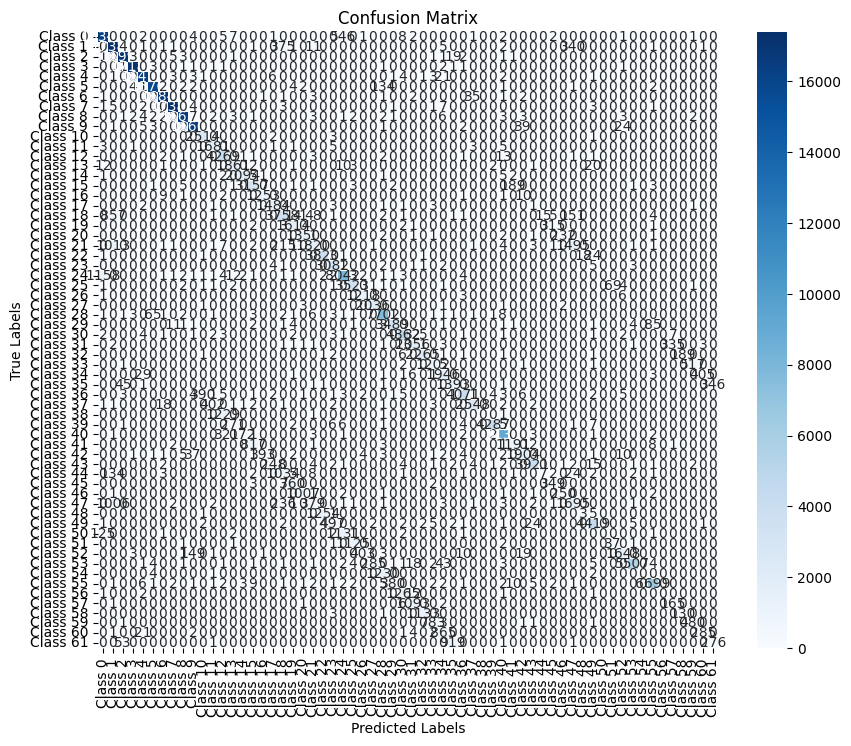

{'val_loss': 0.2957491874694824, 'val_acc': 0.9004456222885622, 'class_precision': array([0.92572659, 0.8517956 , 0.99351143, 0.99901157, 0.99510604,
       0.99469864, 0.99727666, 0.99839191, 0.99831993, 0.98714379,
       0.86273164, 0.80009519, 0.76752967, 0.8603791 , 0.92124945,
       0.78649726, 0.75985446, 0.84897025, 0.66643022, 0.66776996,
       0.57034221, 0.79199304, 0.75167257, 0.8504415 , 0.82465135,
       0.7545513 , 0.74723926, 0.87569892, 0.84553738, 0.89969056,
       0.78533355, 0.63692689, 0.66441772, 0.59682224, 0.66575436,
       0.59555366, 0.99002918, 0.98188825, 0.        , 0.99767279,
       0.99078391, 0.85376344, 0.95919395, 0.98840434, 0.31818182,
       0.5155096 , 0.51546392, 0.45662716, 0.14285714, 0.97765487,
       0.        , 0.3490566 , 0.96713615, 0.9963814 , 0.        ,
       0.98225806, 0.        , 0.32480315, 0.40752351, 0.47808765,
       0.41007194, 0.4437299 ]), 'class_recall': array([0.96554984, 0.95896304, 0.99776917, 0.99918586, 0.9971544

In [35]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def validation_step(batch):
    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)
    out = model(images)  # Generate predictions
    loss = F.cross_entropy(out, labels)  # Calculate loss
    _, preds = torch.max(out, dim=1)
    return {'val_loss': loss, 'preds': preds, 'labels': labels}

def validation_epoch_end(outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()  # Combine losses

    all_preds = torch.cat([x['preds'] for x in outputs])
    all_labels = torch.cat([x['labels'] for x in outputs])
    
    # Calculate accuracy
    correct = torch.sum(all_preds == all_labels).item()
    total_samples = len(all_labels)
    epoch_acc = correct / total_samples
    
    # Calculate precision, recall, and f1-score for each class
    all_preds_cpu = all_preds.cpu().numpy()
    all_labels_cpu = all_labels.cpu().numpy()
    
    precision = precision_score(all_labels_cpu, all_preds_cpu, average=None)
    recall = recall_score(all_labels_cpu, all_preds_cpu, average=None)
    f1 = f1_score(all_labels_cpu, all_preds_cpu, average=None)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(all_labels_cpu, all_preds_cpu)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[f'Class {i}' for i in range(conf_matrix.shape[1])], 
                yticklabels=[f'Class {i}' for i in range(conf_matrix.shape[0])])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return {
        'val_loss': epoch_loss.item(),
        'val_acc': epoch_acc,
        'class_precision': precision,
        'class_recall': recall,
        'class_f1': f1
    }

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [validation_step(batch) for batch in val_loader]
    return validation_epoch_end(outputs)

# Assuming `device` is already defined and `test_loader` is your DataLoader for the validation set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
metrics = evaluate(model, test_loader)
print(metrics)


       Class  Precision    Recall  F1 Score
0    Class 0   0.925727  0.965550  0.945219
1    Class 1   0.851796  0.958963  0.902208
2    Class 2   0.993511  0.997769  0.995636
3    Class 3   0.999012  0.999186  0.999099
4    Class 4   0.995106  0.997154  0.996129
..       ...        ...       ...       ...
57  Class 57   0.324803  0.130126  0.185811
58  Class 58   0.407524  0.102605  0.163934
59  Class 59   0.478088  0.377953  0.422164
60  Class 60   0.410072  0.241321  0.303838
61  Class 61   0.443730  0.220624  0.294714

[62 rows x 4 columns]


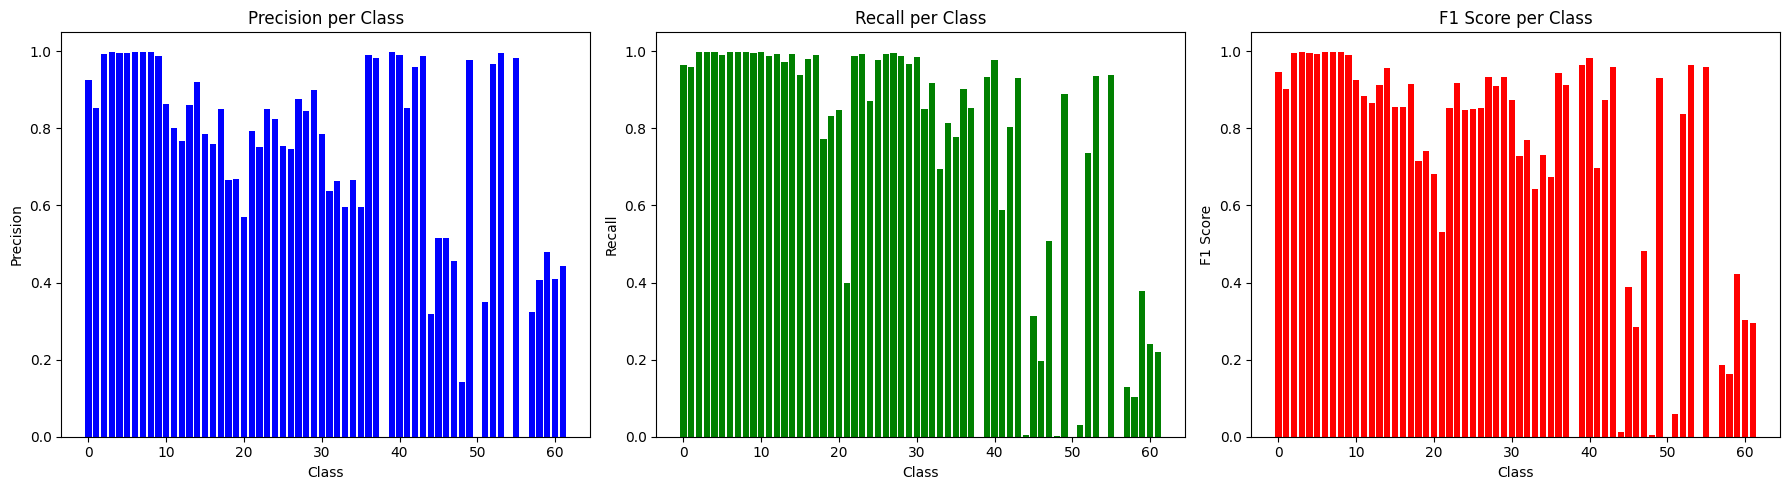

In [36]:
import pandas as pd

# Creating a DataFrame for class metrics
class_names = [f'Class {i}' for i in range(len(metrics['class_precision']))]
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': metrics['class_precision'],
    'Recall': metrics['class_recall'],
    'F1 Score': metrics['class_f1']
})

print(metrics_df)

# Plotting Precision, Recall, and F1 Score
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Precision
ax[0].bar(range(len(metrics['class_precision'])), metrics['class_precision'], color='blue')
ax[0].set_title('Precision per Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Precision')

# Recall
ax[1].bar(range(len(metrics['class_recall'])), metrics['class_recall'], color='green')
ax[1].set_title('Recall per Class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Recall')

# F1 Score
ax[2].bar(range(len(metrics['class_f1'])), metrics['class_f1'], color='red')
ax[2].set_title('F1 Score per Class')
ax[2].set_xlabel('Class')
ax[2].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


In [23]:
import torch
import torch.nn as nn

class ResidualBlock(nn.Module):
    """
    A residual block for use in ResNet architectures.
    """
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        # First convolutional layer with batch normalization and ReLU activation
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        # Second convolutional layer with batch normalization
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        # Downsampling layer if needed
        self.downsample = downsample

    def forward(self, x):
        """
        Forward pass through the residual block.
        
        Args:
            x (torch.Tensor): Input tensor.
        
        Returns:
            torch.Tensor: Output tensor.
        """
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        out += identity
        out = self.relu(out)

        return out

class Bottleneck(nn.Module):
    """
    A bottleneck block for use in ResNet architectures with a three-layer configuration.
    """
    expansion = 4  # Factor to expand the number of channels after the block

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        # First convolutional layer with batch normalization and ReLU activation
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        # Second convolutional layer with batch normalization
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        # Third convolutional layer with batch normalization
        self.conv3 = nn.Conv2d(out_channels, out_channels * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * self.expansion)
        # Downsampling layer if needed
        self.downsample = downsample

    def forward(self, x):
        """
        Forward pass through the bottleneck block.
        
        Args:
            x (torch.Tensor): Input tensor.
        
        Returns:
            torch.Tensor: Output tensor.
        """
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    """
    ResNet architecture that uses residual blocks for deep learning.
    """
    def __init__(self, block, layers, num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        # Initial convolutional layer followed by batch normalization and ReLU activation
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)  # 1 input channel for grayscale images
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Layers composed of residual blocks
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        # Global average pooling and fully connected layer for classification
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        """
        Creates a sequence of residual blocks.
        
        Args:
            block (nn.Module): The block type to use (ResidualBlock or Bottleneck).
            out_channels (int): Number of output channels for the block.
            blocks (int): Number of blocks to stack.
            stride (int): The stride for the first block.
        
        Returns:
            nn.Sequential: A sequence of residual blocks.
        """
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        """
        Forward pass through the ResNet model.
        
        Args:
            x (torch.Tensor): Input tensor.
        
        Returns:
            torch.Tensor: Output tensor.
        """
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

def ResNet34(num_classes):
    """
    Creates a ResNet-34 model.
    
    Args:
        num_classes (int): Number of output classes.
    
    Returns:
        ResNet: ResNet-34 model instance.
    """
    return ResNet(ResidualBlock, [3, 4, 6, 3], num_classes)

def ResNet50(num_classes):
    """
    Creates a ResNet-50 model.
    
    Args:
        num_classes (int): Number of output classes.
    
    Returns:
        ResNet: ResNet-50 model instance.
    """
    return ResNet(Bottleneck, [3, 4, 6, 3], num_classes)


In [24]:
rnmodel = ResNet34(62)
print(rnmodel)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=Tr

In [25]:
summary(rnmodel.to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           3,136
       BatchNorm2d-2           [-1, 64, 14, 14]             128
              ReLU-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]          36,864
       BatchNorm2d-6             [-1, 64, 7, 7]             128
              ReLU-7             [-1, 64, 7, 7]               0
            Conv2d-8             [-1, 64, 7, 7]          36,864
       BatchNorm2d-9             [-1, 64, 7, 7]             128
             ReLU-10             [-1, 64, 7, 7]               0
    ResidualBlock-11             [-1, 64, 7, 7]               0
           Conv2d-12             [-1, 64, 7, 7]          36,864
      BatchNorm2d-13             [-1, 64, 7, 7]             128
             ReLU-14             [-1, 6

In [41]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnmodel.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)

In [46]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        """
        Initialize the early stopping object.

        Args:
            patience (int): Number of epochs to wait for improvement before stopping.
            verbose (bool): Print messages when stopping.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0

    def __call__(self, val_loss, model, path_to_save_model):
        """
        Check if the validation loss has improved.

        Args:
            val_loss (float): Current validation loss.
            model (torch.nn.Module): The model to save.
            path_to_save_model (str): Path to save the best model.
        """
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model, path_to_save_model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            self.save_checkpoint(val_loss, model, path_to_save_model)

    def save_checkpoint(self, val_loss, model, path_to_save_model):
        """
        Save the model when validation loss decreases.

        Args:
            val_loss (float): Current validation loss.
            model (torch.nn.Module): The model to save.
            path_to_save_model (str): Path to save the best model.
        """
        if self.verbose:
            print(f'Validation loss decreased ({self.best_score:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), path_to_save_model)


In [47]:
import matplotlib.pyplot as plt

# Define the early stopping object
early_stopping = EarlyStopping(patience=5, verbose=True, delta=0.001)

# Training loop
for epoch in range(epochs):
    print(f'Epoch: {epoch + 1}')
    x_epoch.append(epoch)
    
    # Training phase
    rnmodel.to(device)
    rnmodel.train()
    running_loss = 0.0
    epoch_loss = 0.0
    
    for (batch_idx, batch) in enumerate(train_loader):
        train_data, train_labels = batch
        train_data = train_data.to(device)
        train_labels = train_labels.to(device)
        predictions = rnmodel(train_data)
        loss = loss_fn(predictions, train_labels)
        running_loss += loss.item()
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_idx % 500 == 499:  # print every 500 batches
            avg_loss_across_batches = running_loss / 500
            print(f'Batch {batch_idx + 1}, Loss: {avg_loss_across_batches:.3f}')
            running_loss = 0.0
    
    y_loss["train"].append(epoch_loss / len(train_loader))
    print()
    
    # Validation phase
    rnmodel.eval()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0
    
    with torch.no_grad():
        for (batch_idx, batch) in enumerate(val_loader):
            test_data, test_labels = batch[0].to(device), batch[1].to(device)
            test_predictions = rnmodel(test_data)
            test_loss = loss_fn(test_predictions, test_labels)
            running_loss += test_loss.item()
            
            # Use torch.argmax to get the class with the highest score
            _, predicted = torch.max(test_predictions, 1)
            total_correct += (predicted == test_labels).sum().item()  # Compare predicted and actual labels
            total_samples += test_labels.size(0)

    accuracy = total_correct / total_samples
    avg_loss_across_batches = running_loss / len(val_loader)
    y_loss["val"].append(avg_loss_across_batches)
    accuracy_vals.append(accuracy)
    
    print(f'Val Loss: {avg_loss_across_batches:.3f}')
    print(f'Total Correct: {total_correct}')
    print(f'Total Samples: {total_samples}')
    print(f'Accuracy: {accuracy:.3f}')
    print('***************************************************')
    print()
    
    # Check early stopping
    early_stopping(avg_loss_across_batches, rnmodel, './models/rnaug2instance.pt')
    if early_stopping.early_stop:
        print("Early stopping")
        break
    
    scheduler.step()

# Save final model
rnmodel.to('cpu')
torch.save(rnmodel.state_dict(), "./models/rnaug2instance.pt")

# Plot loss and accuracy
plt.plot(x_epoch, y_loss["train"], label="Train Loss")
plt.plot(x_epoch, y_loss["val"], label="Val Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(x_epoch, accuracy_vals, label="Val Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch: 1
Batch 500, Loss: 0.476
Batch 1000, Loss: 0.470
Batch 1500, Loss: 0.468
Batch 2000, Loss: 0.462
Batch 2500, Loss: 0.459
Batch 3000, Loss: 0.443
Batch 3500, Loss: 0.442
Batch 4000, Loss: 0.438
Batch 4500, Loss: 0.440
Batch 5000, Loss: 0.436
Batch 5500, Loss: 0.427
Batch 6000, Loss: 0.436
Batch 6500, Loss: 0.429
Batch 7000, Loss: 0.424
Batch 7500, Loss: 0.420
Batch 8000, Loss: 0.416
Batch 8500, Loss: 0.416
Batch 9000, Loss: 0.421
Batch 9500, Loss: 0.416
Batch 10000, Loss: 0.425
Batch 10500, Loss: 0.413
Batch 11000, Loss: 0.404
Batch 11500, Loss: 0.410
Batch 12000, Loss: 0.403
Batch 12500, Loss: 0.407
Batch 13000, Loss: 0.405
Batch 13500, Loss: 0.408

Val Loss: 0.398
Total Correct: 164739
Total Samples: 193347
Accuracy: 0.852
***************************************************

Validation loss decreased (-0.397908 --> 0.397908).  Saving model ...
Epoch: 2
Batch 500, Loss: 0.394
Batch 1000, Loss: 0.389
Batch 1500, Loss: 0.397
Batch 2000, Loss: 0.390
Batch 2500, Loss: 0.392
Batch 30

KeyboardInterrupt: 

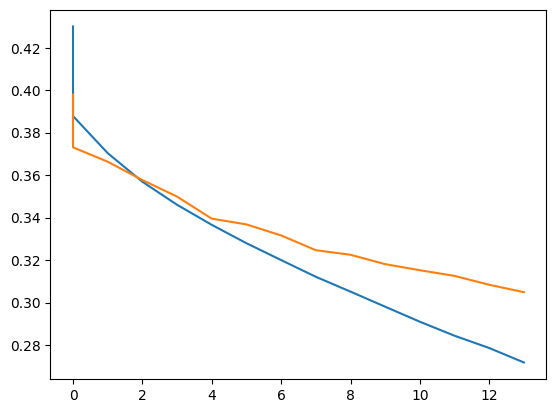

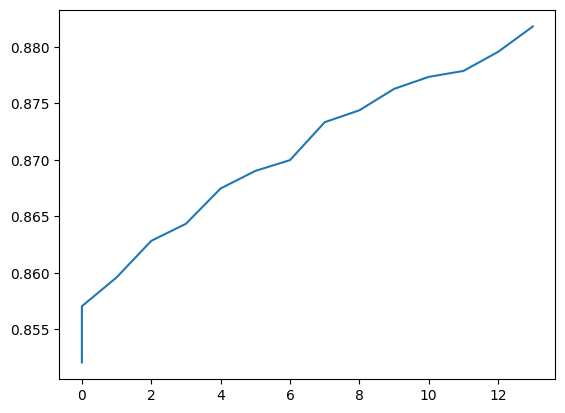

In [49]:
rnmodel.to('cpu')
torch.save(rnmodel.state_dict(), "./models/rnaug1instance.pt")
#dt = datetime.now()
#torch.save(ecnnmodel.state_dict(), "./models/eight_1cnn_architecture_model_" + dt.strftime("%m%d%Y_%H_%M_%S") + "0.000001lr_adam_bcewithlogits_32batchsize_balanced" + ".pt")
plt.plot(x_epoch[0:-2], y_loss["train"], label="train")
plt.plot(x_epoch[0:-2], y_loss["val"], label="val")
plt.show()
#plt.savefig("./visualizations/smallerEightCNNArchitectureLoss" + dt.strftime("%m%d%Y_%H_%M_%S") + "0.000001lr_adam_bcewithlogits_32batchsize_balanced" + ".png", bbox_inches="tight", pad_inches=0.3)
plt.plot(x_epoch[0:-2], accuracy_vals, label="val")
plt.show()
#plt.savefig("./visualizations/smallerEightCNNArchitectureAcc" + dt.strftime("%m%d%Y_%H_%M_%S") + "0.000001lr_adam_bcewithlogits_32batchsize_balanced" + ".png", bbox_inches="tight", pad_inches=0.3)
#torch.save(ecnnmodel.state_dict(), "./models/eight_cnn_architecture_model_" + dt.strftime("%m%d%Y_%H_%M_%S_") + str(scheduler.get_last_lr()[0]) + "lr_adam_bcewithlogits_32batchsize_balanced" + ".pt")
#plt.savefig("./visualizations/smallerEightCNNArchitectureAcc" + dt.strftime("%m%d%Y_%H_%M_%S_") + str(scheduler.get_last_lr()[0]) + "lr_adam_bcewithlogits_32batchsize_balanced" + ".png", bbox_inches="tight", pad_inches=0.3)

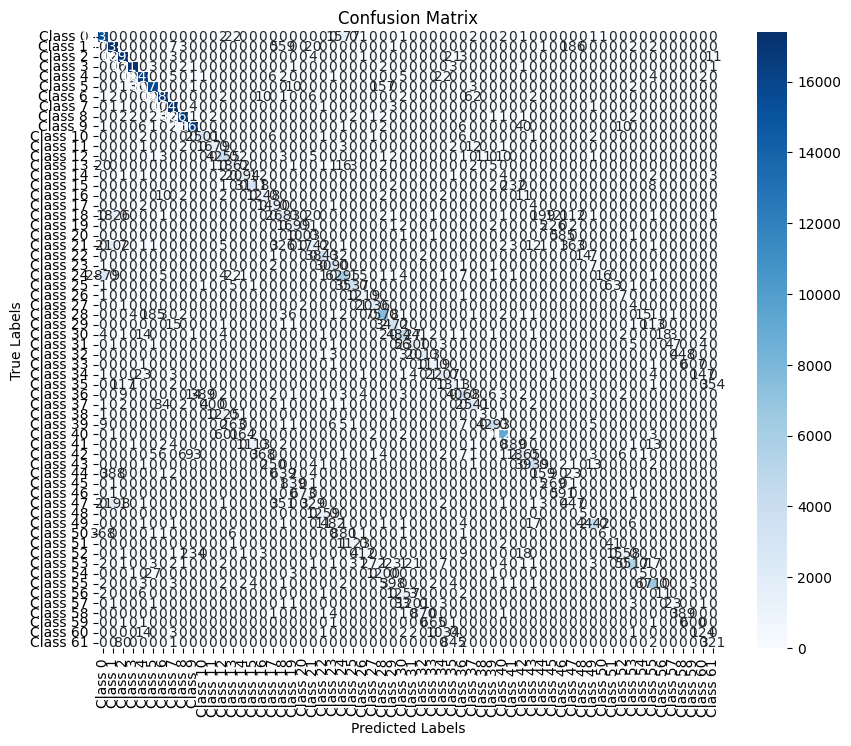

{'val_loss': 0.3025537133216858, 'val_acc': 0.8836292770119722, 'class_precision': array([0.82296985, 0.72672056, 0.98652808, 0.99930184, 0.99528587,
       0.98553538, 0.99591063, 0.99679212, 0.99868153, 0.97943233,
       0.86479945, 0.80643612, 0.76391382, 0.85373682, 0.92450331,
       0.73555084, 0.76470588, 0.84755404, 0.58631993, 0.66237817,
       0.5977354 , 0.81516144, 0.75      , 0.85976628, 0.71607326,
       0.75722543, 0.74058323, 0.88024211, 0.84538153, 0.88911652,
       0.77865295, 0.64643058, 0.6972636 , 0.62479062, 0.67225099,
       0.59926974, 0.9857039 , 0.96763138, 0.21428571, 0.99513213,
       0.99595938, 0.78812057, 0.96084493, 0.98870482, 0.42627346,
       0.52030948, 0.50127226, 0.3938326 , 0.23809524, 0.98952996,
       0.26086957, 0.39423077, 0.9829653 , 0.99459167, 0.23809524,
       0.9742994 , 0.37931034, 0.31081081, 0.46475508, 0.49586777,
       0.44285714, 0.46387283]), 'class_recall': array([0.9048632 , 0.95692223, 0.99735822, 0.99883694, 0.9970333

In [51]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def validation_step(batch):
    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)
    out = rnmodel(images)  # Generate predictions
    loss = F.cross_entropy(out, labels)  # Calculate loss
    _, preds = torch.max(out, dim=1)
    return {'val_loss': loss, 'preds': preds, 'labels': labels}

def validation_epoch_end(outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()  # Combine losses

    all_preds = torch.cat([x['preds'] for x in outputs])
    all_labels = torch.cat([x['labels'] for x in outputs])
    
    # Calculate accuracy
    correct = torch.sum(all_preds == all_labels).item()
    total_samples = len(all_labels)
    epoch_acc = correct / total_samples
    
    # Calculate precision, recall, and f1-score for each class
    all_preds_cpu = all_preds.cpu().numpy()
    all_labels_cpu = all_labels.cpu().numpy()
    
    precision = precision_score(all_labels_cpu, all_preds_cpu, average=None)
    recall = recall_score(all_labels_cpu, all_preds_cpu, average=None)
    f1 = f1_score(all_labels_cpu, all_preds_cpu, average=None)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(all_labels_cpu, all_preds_cpu)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[f'Class {i}' for i in range(conf_matrix.shape[1])], 
                yticklabels=[f'Class {i}' for i in range(conf_matrix.shape[0])])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return {
        'val_loss': epoch_loss.item(),
        'val_acc': epoch_acc,
        'class_precision': precision,
        'class_recall': recall,
        'class_f1': f1
    }

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [validation_step(batch) for batch in val_loader]
    return validation_epoch_end(outputs)

# Assuming `device` is already defined and `test_loader` is your DataLoader for the validation set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rnmodel.to(device)
metrics = evaluate(rnmodel, test_loader)
print(metrics)


       Class  Precision    Recall  F1 Score
0    Class 0   0.822970  0.904863  0.861976
1    Class 1   0.726721  0.956922  0.826084
2    Class 2   0.986528  0.997358  0.991914
3    Class 3   0.999302  0.998837  0.999069
4    Class 4   0.995286  0.997033  0.996159
..       ...        ...       ...       ...
57  Class 57   0.310811  0.018139  0.034277
58  Class 58   0.464755  0.307024  0.369772
59  Class 59   0.495868  0.472441  0.483871
60  Class 60   0.442857  0.104996  0.169747
61  Class 61   0.463873  0.256595  0.330417

[62 rows x 4 columns]


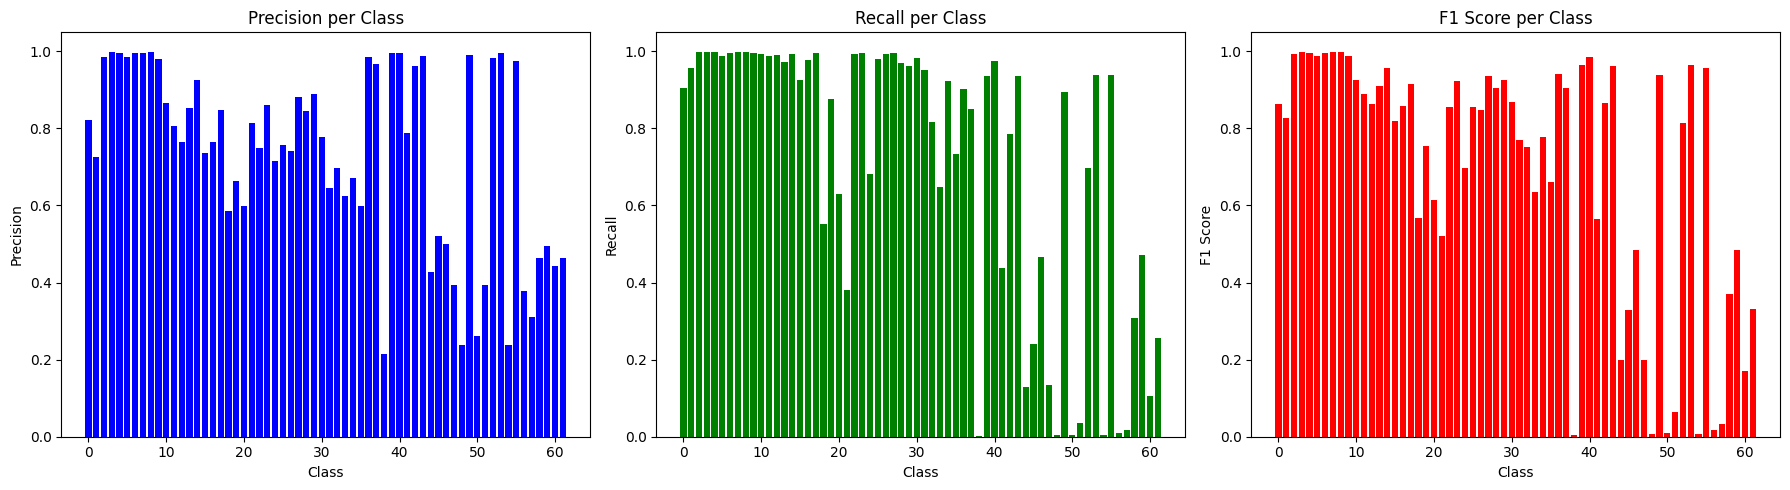

In [52]:
import pandas as pd

# Creating a DataFrame for class metrics
class_names = [f'Class {i}' for i in range(len(metrics['class_precision']))]
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': metrics['class_precision'],
    'Recall': metrics['class_recall'],
    'F1 Score': metrics['class_f1']
})

print(metrics_df)

# Plotting Precision, Recall, and F1 Score
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Precision
ax[0].bar(range(len(metrics['class_precision'])), metrics['class_precision'], color='blue')
ax[0].set_title('Precision per Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Precision')

# Recall
ax[1].bar(range(len(metrics['class_recall'])), metrics['class_recall'], color='green')
ax[1].set_title('Recall per Class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Recall')

# F1 Score
ax[2].bar(range(len(metrics['class_f1'])), metrics['class_f1'], color='red')
ax[2].set_title('F1 Score per Class')
ax[2].set_xlabel('Class')
ax[2].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


In [26]:
rnmodel.load_state_dict(torch.load('./models/rnaug2instance.pt', map_location=device))

<All keys matched successfully>

In [27]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def validation_step(batch, model, device):
    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)
    out = model(images)  # Generate predictions
    loss = F.cross_entropy(out, labels)  # Calculate loss
    _, preds = torch.max(out, dim=1)
    return {'val_loss': loss, 'preds': preds, 'labels': labels}

def validation_epoch_end(outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()  # Combine losses

    all_preds = torch.cat([x['preds'] for x in outputs])
    all_labels = torch.cat([x['labels'] for x in outputs])
    
    # Calculate accuracy
    correct = torch.sum(all_preds == all_labels).item()
    total_samples = len(all_labels)
    epoch_acc = correct / total_samples
    
    # Calculate precision, recall, and f1-score
    precision = precision_score(all_labels.cpu(), all_preds.cpu(), average='weighted')
    recall = recall_score(all_labels.cpu(), all_preds.cpu(), average='weighted')
    f1 = f1_score(all_labels.cpu(), all_preds.cpu(), average='weighted')
    
    return {
        'val_loss': epoch_loss.item(),
        'val_acc': epoch_acc,
        'val_precision': precision,
        'val_recall': recall,
        'val_f1': f1
    }

@torch.no_grad()
def evaluate(model, test_loader, device):
    model.eval()
    outputs = [validation_step(batch, model, device) for batch in test_loader]
    return validation_epoch_end(outputs)

# Assuming `device` is already defined and `test_loader` is your DataLoader for the test set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Evaluate CNN model
cnn_metrics = evaluate(model, test_loader, device)
print(f'CNN Model Metrics: {cnn_metrics}')

# Evaluate ResNet model
resnet_metrics = evaluate(rnmodel, test_loader, device)
print(f'ResNet Model Metrics: {resnet_metrics}')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CNN Model Metrics: {'val_loss': 0.2957491874694824, 'val_acc': 0.9004456222885622, 'val_precision': 0.8815574349987284, 'val_recall': 0.9004456222885622, 'val_f1': 0.8849774454015092}
ResNet Model Metrics: {'val_loss': 0.305064857006073, 'val_acc': 0.881152908026787, 'val_precision': 0.8639166680802667, 'val_recall': 0.881152908026787, 'val_f1': 0.8608566077044028}


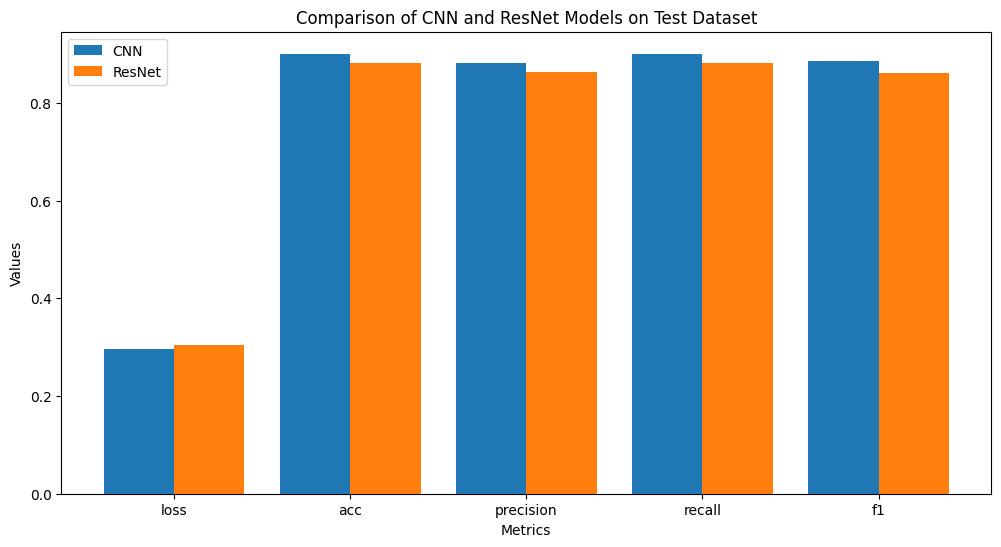

In [33]:
import numpy as np

# Combine the metrics into lists for plotting
metrics_names = ['val_loss', 'val_acc', 'val_precision', 'val_recall', 'val_f1']
xticks_metrics_names = ['loss', 'acc', 'precision', 'recall', 'f1']
cnn_metrics_list = [cnn_metrics[metric] for metric in metrics_names]
resnet_metrics_list = [resnet_metrics[metric] for metric in metrics_names]

# Plot the metrics
plt.figure(figsize=(12, 6))
x = np.arange(len(metrics_names))

plt.bar(x - 0.2, cnn_metrics_list, 0.4, label='CNN')
plt.bar(x + 0.2, resnet_metrics_list, 0.4, label='ResNet')

plt.xticks(x, xticks_metrics_names)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of CNN and ResNet Models on Test Dataset')
plt.legend()
plt.show()


In [35]:
combined_classes[letters[29][1]]

'a'

In [43]:
train_datasets_tensors[0][29][0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9686, -0.9686,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -0.9373, -0.6392, -0.0196, -0.1137,
          -0.7333, -0.9765, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

43 43 h h


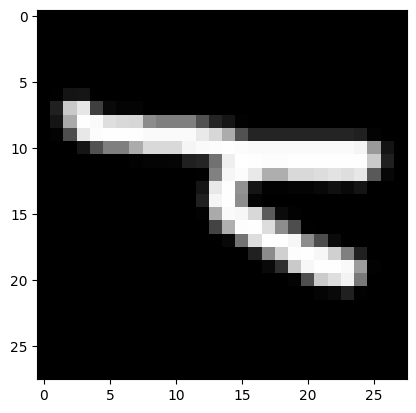

In [75]:
split = 0
index = 88
model.to(device)
images, labels = train_datasets_tensors[split][index]
images = images.to(device)
output = model(images.unsqueeze(0))
_, predicted = torch.max(output, 1)
print(predicted.item(), labels, combined_classes[predicted.item()], combined_classes[labels])
plt.imshow(train_datasets[split][index][0], cmap='gray')
train_datasets[split][index][0].save("img1.png","PNG")

In [71]:
def predict(image, model):
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return combined_classes[predicted.item()]

In [74]:
from PIL import Image
image = Image.open('./test_images/Screenshot_1.png').convert("L")
newImg1.save("img1.png","PNG")
predict(image, model)

'Y'